# Read HDF5 file from OpenMC to load multi-group cross sections
Here, we load the cross sections from an OpenMC HDF5 file.

To run the code, simply type: `jupyter nbconvert --to python --execute <basename>.ipynb`.

To convert it to a python file (named `<basename>.py`), simply type: `jupyter nbconvert --to python <basename>.ipynb`

In [62]:
import os
import sys
import numpy as np

#sys.path.append("../..")

from pyopensn.xs import MultiGroupXS
from pyopensn.context import UseColor, Finalize
import matplotlib.pyplot as plt
UseColor(False)

In [12]:
xs_uo2.LoadFromOpenMC?

Docstring:
LoadFromOpenMC(self: pyopensn.xs.MultiGroupXS, file_name: str, dataset_name: str, temperature: float) -> None

Load multi-group cross sections from an OpenMC cross-section file.
Type:      method

## Call OpenMC cross-section reader

In [69]:
# load cross sections
xs_uo2 = MultiGroupXS()
filepath = '2P/mgxs_casl_2p/mgxs_2p_one_eighth_SHEM-361.h5'

#filepath = "../../../test/python/modules/linear_boltzmann_solvers/transport_keigen/uo2.h5"
xs_uo2.LoadFromOpenMC(filepath, "gd_fuel", 294)

[0]  Reading OpenMC cross-section file "2P/mgxs_casl_2p/mgxs_2p_one_eighth_SHEM-361.h5"
[0]  2P/mgxs_casl_2p/mgxs_2p_one_eighth_SHEM-361.h5 cross-section data evaluated at 294K
[0]  *** WARNING ***  Estimating absorption from the transfer matrices.
[0]  *** WARNING ***  Negative absorption cross section encountered in group 2 when estimating from the transfer matrices
[0]  *** WARNING ***  Negative absorption cross section encountered in group 4 when estimating from the transfer matrices


## Some cross-section data can be retrieved in Python

num_groups       =  361
scattering_order =  7
sigt =  361


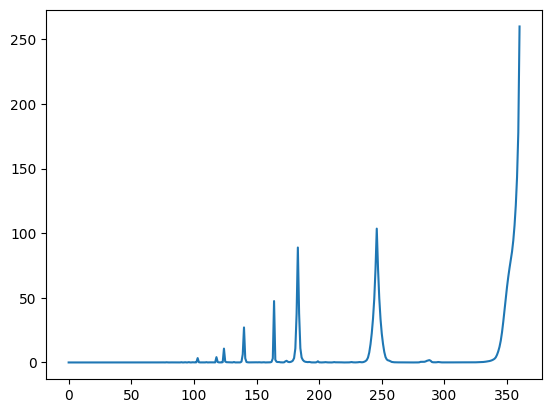

In [70]:
# Retrieve properties
ng = xs_uo2.num_groups
sca_order = xs_uo2.scattering_order

print("num_groups       = ", ng)
print("scattering_order = ", sca_order)

# note cross sections are read-only objects of type <memoryview>
# retrieve a numpy array
#siga = np.array(xs_uo2.sigma_a)
#print("siga = ", siga)
# retrieve as list
sigt = np.array(xs_uo2.sigma_a)
print("sigt = ", sigt.size)
x=np.arange(sigt.size)
plt.plot(x,sigt)

## Finalize (for Jupyter Notebook only)

In Python script mode, PyOpenSn automatically handles environment termination. However, this
automatic finalization does not occur when running in a Jupyter notebook, so explicit finalization
of the environment at the end of the notebook is required. Do not call the finalization in Python
script mode, or in console mode.

Note that PyOpenSn's finalization must be called before MPI's finalization.


In [ ]:
from IPython import get_ipython

def finalize_env():
    Finalize()
    MPI.Finalize()

ipython_instance = get_ipython()
if ipython_instance is not None:
    ipython_instance.events.register("post_execute", finalize_env)